## Loan Default Predciton


By using Given features from dataset of bank's customer, We need to find out If a customer will be repaying loan or not.

First of all import usful python Libraries


In [ ]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as mcm
import scipy as sp 
import seaborn as sns

Insert data using pandas

In [351]:
df = pd.read_csv("credit.csv")

In [352]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


 check data description to know whether a column has null value or not, we don't have null specifically. but we have value named= 'unknown'. we need to do something about it. 

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


first of all to see inter dependencies for features, I build the interdependenices Graphs btw categorical variables. 

--> create function to draw bar charts 

In [353]:
def abs_bar_labels():
    font_size = 15
    plt.ylabel('Absolute Frequency', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([])
    
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')

    
    
def pct_bar_labels():
    font_size = 15
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([]) 
    
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')

In [355]:
def crosstab(cat, cat_target,order):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax, ax1
    fig_size = (18, 5)
    title_size = 18
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
    
    print(cat_grouped_by_cat_target)
    print('-------------------')
    cat_grouped_by_cat_target= cat_grouped_by_cat_target.reindex(order)
    pct_cat_grouped_by_cat_target= pct_cat_grouped_by_cat_target.reindex(order)
    print(cat_grouped_by_cat_target)
    

    # Plot absolute frequency of default by a categorical variable
    ax =  cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'], title = 'Absolute Count of defaults by %s' %cat.name, figsize = fig_size)
    ax.title.set_size(fontsize = title_size)
    abs_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()
    
    # Plot relative frequrncy of default by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'], title = 'Percentage Count of defaults by %s' %cat.name, figsize = fig_size)
    ax1.title.set_size(fontsize = title_size)
    pct_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()

Now draw the bar chart btw 'default' feature and 'credit history'. and result here matches with practicle scenerio. 
those who has 'critical'  credit history have 82.94% chances that they will default or will not pay loan back. and those
who have 'perfect' credit history..have 62.5% chance for paying loan back.

default          no  yes
credit_history          
critical        243   50
good            361  169
perfect          15   25
poor             60   28
very good        21   28
-------------------
default          no  yes
credit_history          
critical        243   50
poor             60   28
good            361  169
very good        21   28
perfect          15   25


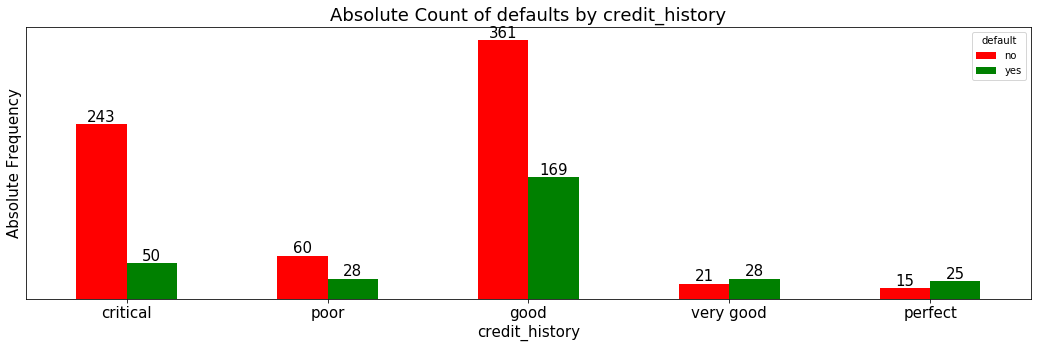

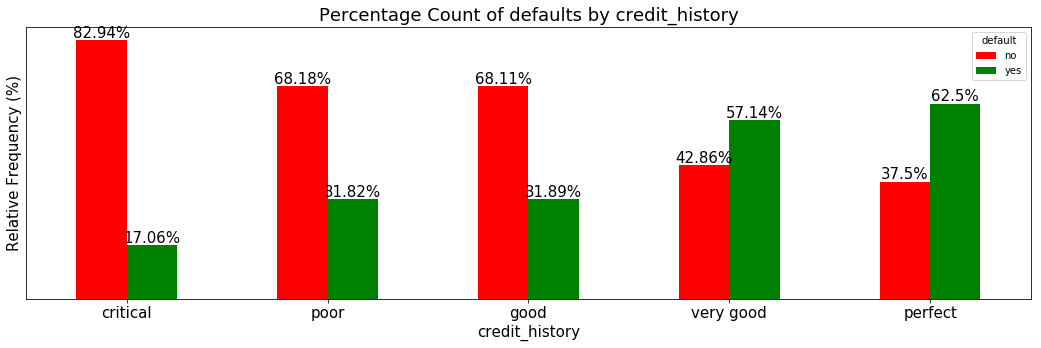

In [356]:
crosstab(df['credit_history'],df['default'],order = ['critical','poor','good','very good','perfect'])

Like upper graph =, we can draw a same graph btw 'hosing' and 'default'..

default   no  yes
housing          
other     64   44
own      527  186
rent     109   70
-------------------
default   no  yes
housing          
rent     109   70
own      527  186
other     64   44


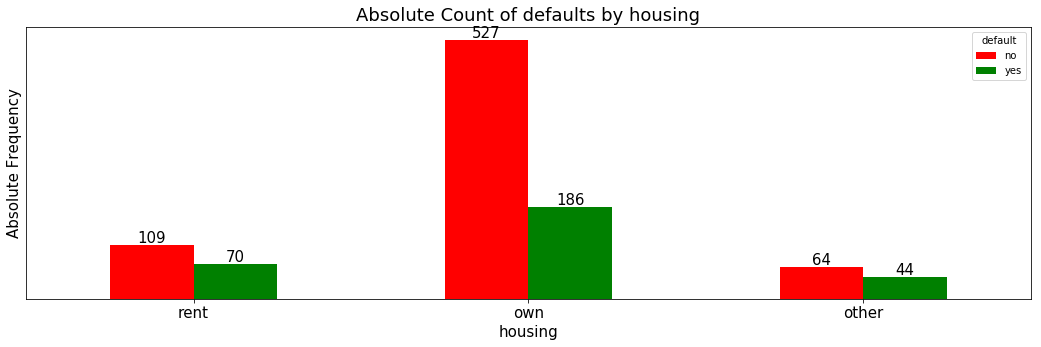

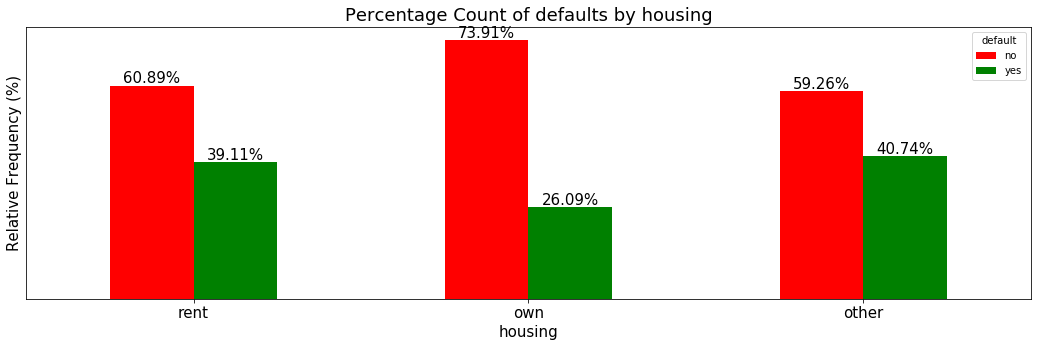

In [357]:
crosstab(df['housing'],df['default'],order= ['rent','own','other'])


The feature 'phone' is not showing much information about the default. so I will drop this feature.

default   no  yes
phone            
no       409  187
yes      291  113
-------------------
default   no  yes
phone            
yes      291  113
no       409  187


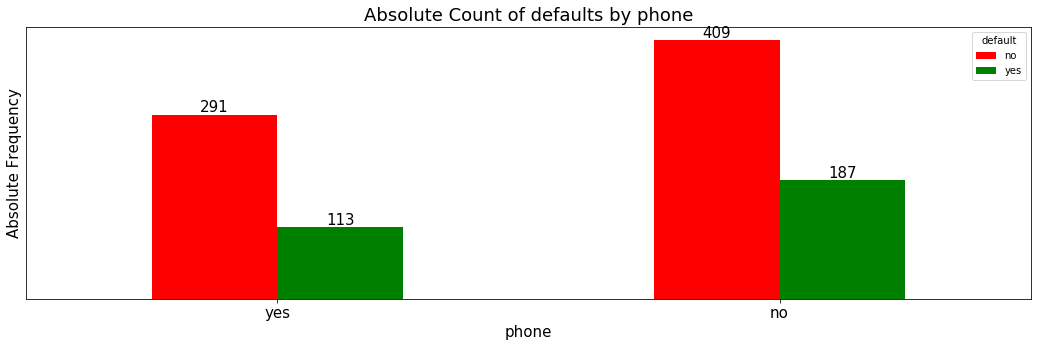

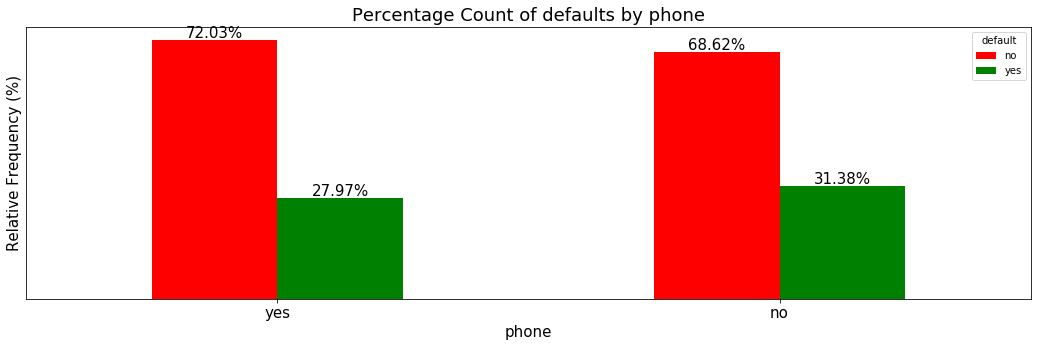

In [358]:
crosstab(df['phone'],df['default'],order= ['yes','no'])

Draw the barchart btw 'purpose'and 'default' and can notice that those who want loan for furniture/appliences are more likely to default 

In [360]:
df.purpose.unique()

array(['furniture/appliances', 'education', 'car', 'business',
       'renovations', 'car0'], dtype=object)

default                no  yes
purpose                       
business               63   34
car                   231  106
car0                    7    5
education              36   23
furniture/appliances  349  124
renovations            14    8
-------------------
default                no  yes
purpose                       
furniture/appliances  349  124
education              36   23
car                   231  106
business               63   34
renovations            14    8
car0                    7    5


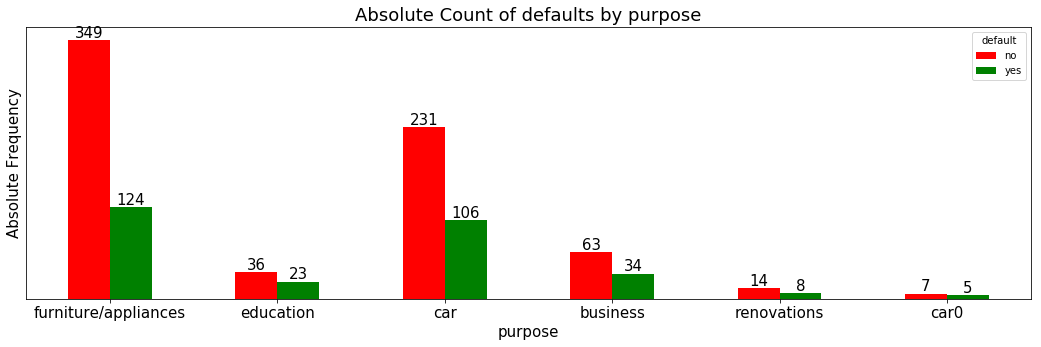

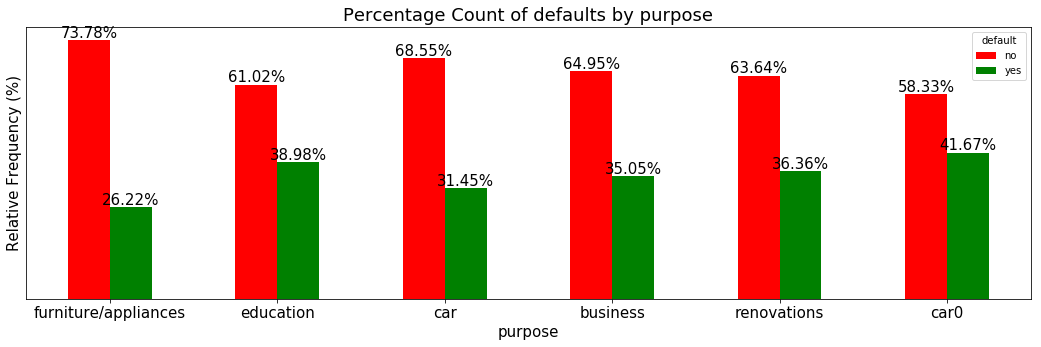

In [361]:
crosstab(df['purpose'],df['default'],order= ['furniture/appliances', 'education', 'car', 'business','renovations', 'car0'] )

Bar chart between jons and default

In [362]:
df.job.unique()

array(['skilled', 'unskilled', 'management', 'unemployed'], dtype=object)

default      no  yes
job                 
management   97   51
skilled     444  186
unemployed   15    7
unskilled   144   56
-------------------
default      no  yes
job                 
unemployed   15    7
unskilled   144   56
skilled     444  186
management   97   51


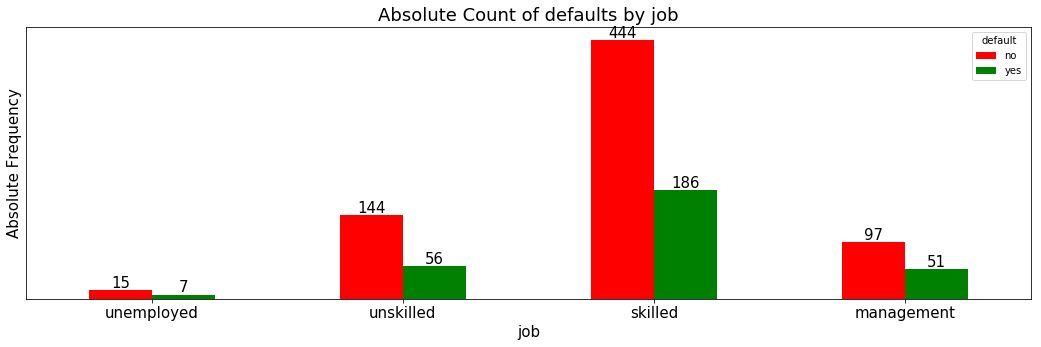

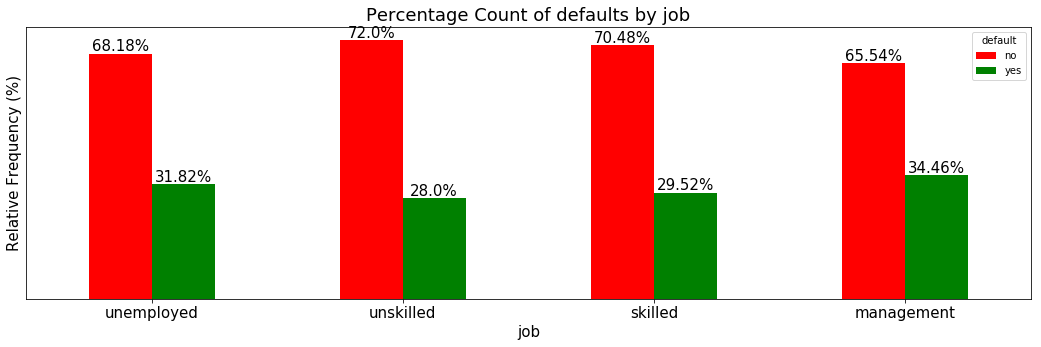

In [363]:
crosstab(df['job'],df['default'],order= ['unemployed','unskilled','skilled','management'])

# Pre Processings 

now I'm processing data so that it can be fitted in sklearn's ML models 
1.  creating dummies of categorical features 
2. add it to df 
3. drop the extra feature

df.housing.value_counts()

In [365]:
housing_dummies  = pd.get_dummies(df['housing'])


In [366]:
df = df.join(housing_dummies)

In [367]:
credit_history_dummies = pd.get_dummies(df['credit_history'])

In [368]:
df = df.join(credit_history_dummies)

In [369]:
job_dummies = pd.get_dummies(df['job'])


In [370]:
df = df.join(job_dummies)

# dataframe after joining above dummies

In [371]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,...,rent,critical,good,perfect,poor,very good,management,skilled,unemployed,unskilled
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,...,0,1,0,0,0,0,0,1,0,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,...,0,0,1,0,0,0,0,1,0,0
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,...,0,1,0,0,0,0,0,0,0,1
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,...,0,0,1,0,0,0,0,1,0,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,...,0,0,0,0,1,0,0,1,0,0


In [372]:
purpose_dummies = pd.get_dummies(df['purpose'])

In [373]:
df = df.join(purpose_dummies)

# Graphs numerical features Vs Categorical features('defaults')

function to plot histograms and density_plots

In [ ]:
def histogram(variable):
    global ax
    font_size = 15
    fig_size = (18, 7)
    title_size = 18
    ax = variable.plot.hist(figsize = fig_size)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.title('%s' %variable.name + ' Distribution with Histogram', fontsize = title_size)
    abs_bar_labels()
    plt.show()
    
'''#2.Plot density plot .'''
def density_plot(variable):
    fig_size = (18, 7)
    font_size = 15
    title_size = 18
    plt.figure(figsize = fig_size)
    variable.plot.hist(density = True)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name, fontsize = font_size)
    plt.ylabel('Density', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title('%s ' %variable.name + 'Distribution with Density Plot & Histogram', fontsize = title_size)
    plt.show()
    
'''#3.Calculate descriptive statistics.'''
def summary_stats(variable):
    stats = variable.describe()
    skew = pd.Series(variable.skew(), index = ['skewness'])
    df_stats = pd.DataFrame(pd.concat([skew, stats], sort = False), columns = [variable.name])
    df_stats.index.name = 'Stats'
    display(df_stats)

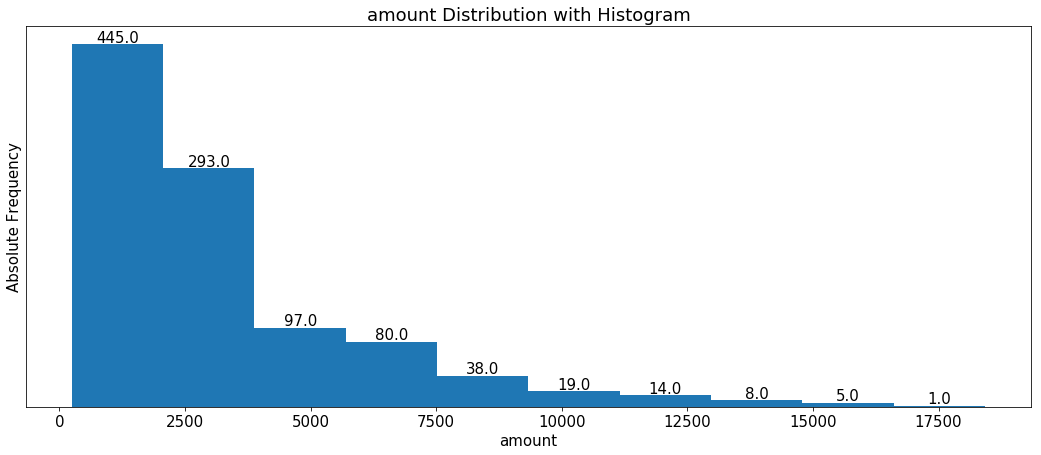

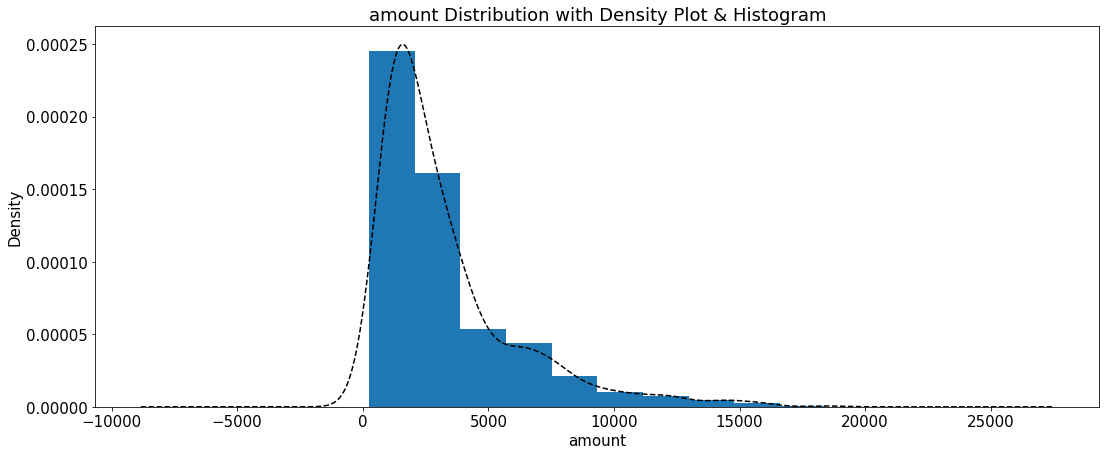

,amount
Stats,
skewness,1.949628
count,1000.000000
mean,3271.258000
std,2822.736876
min,250.000000
25%,1365.500000
50%,2319.500000
75%,3972.250000
max,18424.000000


In [375]:
histogram(df['amount'])
density_plot(df['amount'])
summary_stats(df['amount'])

We can see half of loan's amount  is btw 500 to 2000


# histogram for Duration

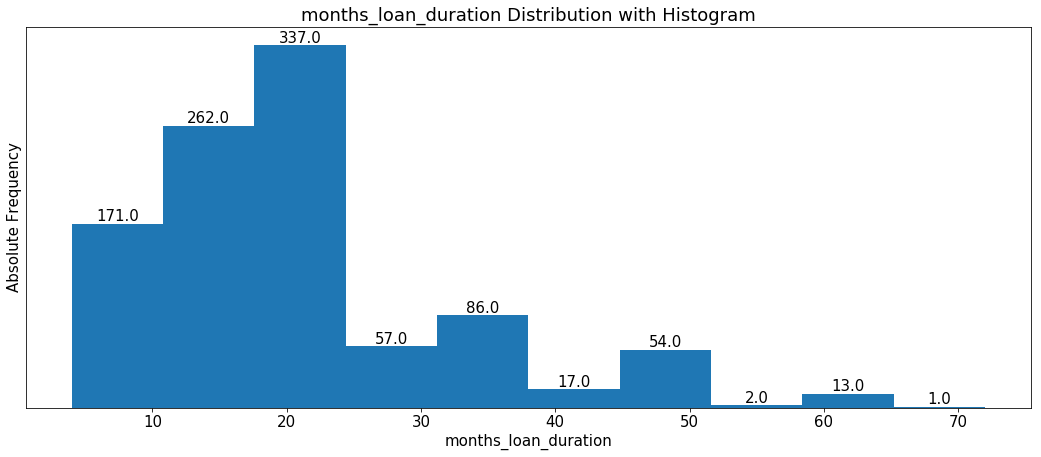

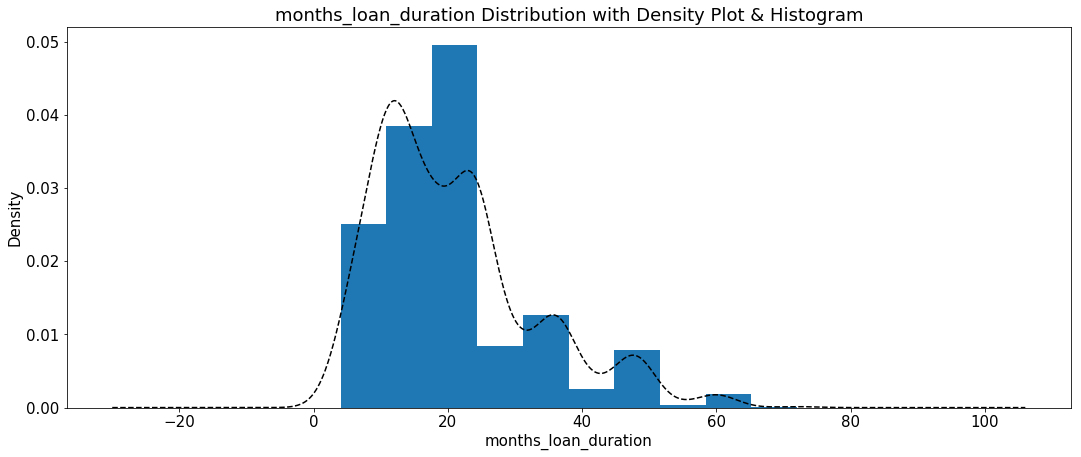

,months_loan_duration
Stats,
skewness,1.094184
count,1000.000000
mean,20.903000
std,12.058814
min,4.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,72.000000


In [376]:
histogram(df['months_loan_duration'])
density_plot(df['months_loan_duration'])
summary_stats(df['months_loan_duration'])

more then half of the loans month duration is btw 12 to 24 months

In [377]:
df.percent_of_income.value_counts()

4    476
2    231
3    157
1    136
Name: percent_of_income, dtype: int64

In [378]:
df.dependents.value_counts()

1    845
2    155
Name: dependents, dtype: int64

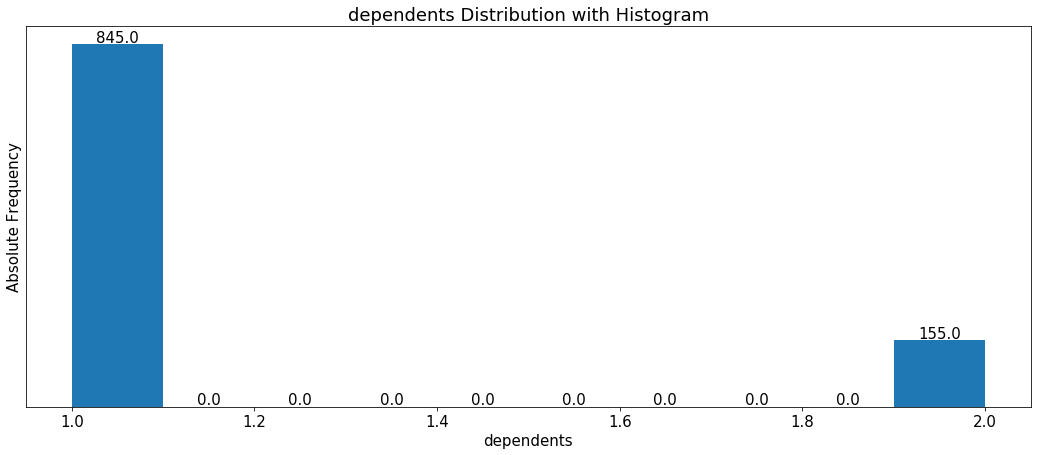

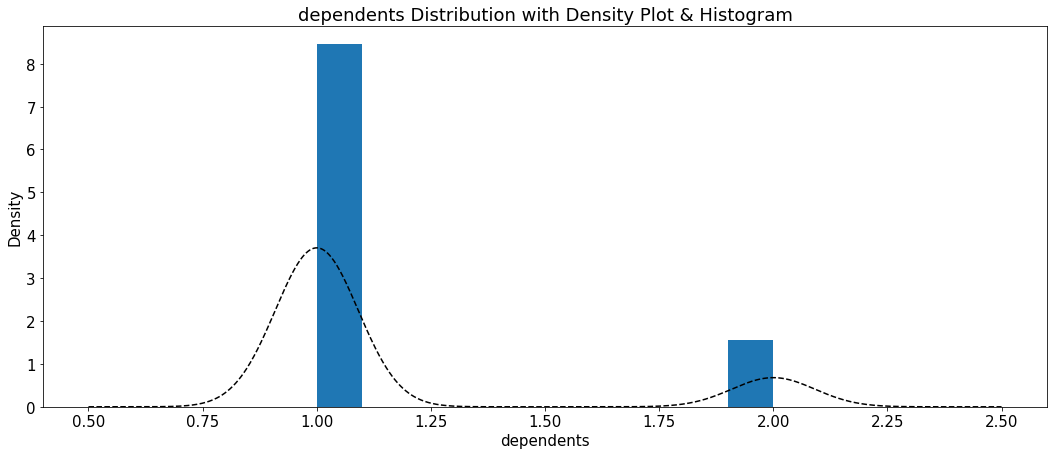

,dependents
Stats,
skewness,1.909445
count,1000.000000
mean,1.155000
std,0.362086
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [379]:
histogram(df['dependents'])
density_plot(df['dependents'])
summary_stats(df['dependents'])

In [380]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,...,management,skilled,unemployed,unskilled,business,car,car0,education,furniture/appliances,renovations
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,...,0,1,0,0,0,0,0,0,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,...,0,1,0,0,0,0,0,0,1,0
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,...,0,0,0,1,0,0,0,1,0,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,...,0,1,0,0,0,0,0,0,1,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,...,0,1,0,0,0,1,0,0,0,0


In [381]:
df = df.drop(['purpose','job','housing','credit_history'], axis =1)

In [382]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'amount', 'savings_balance',
       'employment_duration', 'percent_of_income', 'years_at_residence', 'age',
       'other_credit', 'existing_loans_count', 'dependents', 'default',
       'other', 'own', 'rent', 'critical', 'good', 'perfect', 'poor',
       'very good', 'management', 'skilled', 'unemployed', 'unskilled',
       'business', 'car', 'car0', 'education', 'furniture/appliances',
       'renovations'],
      dtype='object')

# handling NULL type values
checking which all columns are containing NULL type values and processing them

In [383]:
df.checking_balance.value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [384]:
df.savings_balance.value_counts()

< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

In [385]:
df.employment_duration.value_counts()

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

In [386]:
df.other_credit.value_counts()

none     814
bank     139
store     47
Name: other_credit, dtype: int64

other_credit feature seems not to have much importance so drop it 

In [387]:
df = df.drop(['other_credit'], axis =1)

In [388]:
df.head()

,checking_balance,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,...,management,skilled,unemployed,unskilled,business,car,car0,education,furniture/appliances,renovations
0,< 0 DM,6,1169,unknown,> 7 years,4,4,67,2,1,...,0,1,0,0,0,0,0,0,1,0
1,1 - 200 DM,48,5951,< 100 DM,1 - 4 years,2,2,22,1,1,...,0,1,0,0,0,0,0,0,1,0
2,unknown,12,2096,< 100 DM,4 - 7 years,2,3,49,1,2,...,0,0,0,1,0,0,0,1,0,0
3,< 0 DM,42,7882,< 100 DM,4 - 7 years,2,4,45,1,2,...,0,1,0,0,0,0,0,0,1,0
4,< 0 DM,24,4870,< 100 DM,1 - 4 years,3,4,53,2,2,...,0,1,0,0,0,1,0,0,0,0


In [390]:
df = df.drop(['checking_balance'], axis =1)

In [391]:
df.savings_balance.value_counts()

< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

Replacing 'unknown' values with '< 100 DM' ..cause it have most appearences(603)

In [392]:
df['savings_balance'][df['savings_balance'] =='unknown' ] ='< 100 DM'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [401]:
df.employment_duration.value_counts()

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

In [396]:
savings_dummies = pd.get_dummies(df['savings_balance'])

In [412]:
emp_dummies = pd.get_dummies(df['employment_duration'])

df = df.join(emp_dummies, lsuffix = 'em_dur')
df.head()

,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,...,1 - 4 yearsem_dur,4 - 7 yearsem_dur,< 1 yearem_dur,> 7 yearsem_dur,unemployedem_dur,1 - 4 years,4 - 7 years,< 1 year,> 7 years,unemployed
0,6,1169,< 100 DM,> 7 years,4,4,67,2,1,no,...,0,0,0,1,0,0,0,0,1,0
1,48,5951,< 100 DM,1 - 4 years,2,2,22,1,1,yes,...,1,0,0,0,0,1,0,0,0,0
2,12,2096,< 100 DM,4 - 7 years,2,3,49,1,2,no,...,0,1,0,0,0,0,1,0,0,0
3,42,7882,< 100 DM,4 - 7 years,2,4,45,1,2,no,...,0,1,0,0,0,0,1,0,0,0
4,24,4870,< 100 DM,1 - 4 years,3,4,53,2,2,yes,...,1,0,0,0,0,1,0,0,0,0


droping columns after adding thier dummies

In [413]:
df = df.drop(['savings_balance','employment_duration'], axis = 1)

In [414]:

df.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'default', 'other', 'own', 'rent', 'critical', 'good', 'perfect',
       'poor', 'very good', 'management', 'skilled', 'unemployedvikas',
       'unskilled', 'business', 'car', 'car0', 'education',
       'furniture/appliances', 'renovations', '100 - 500 DM', '500 - 1000 DM',
       '< 100 DM', '> 1000 DM', '1 - 4 yearsvikas', '4 - 7 yearsvikas',
       '< 1 yearvikas', '> 7 yearsvikas', 'unemployedvikas',
       '1 - 4 yearsem_dur', '4 - 7 yearsem_dur', '< 1 yearem_dur',
       '> 7 yearsem_dur', 'unemployedem_dur', '1 - 4 years', '4 - 7 years',
       '< 1 year', '> 7 years', 'unemployed'],
      dtype='object')

changing 'default' to 0/1 fromm yes/no

In [415]:
df['default'][df['default'] == 'no'] = 0 
df['default'][df['default'] == 'yes'] = 1 

In [419]:
X.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'other', 'own', 'rent', 'critical', 'good', 'perfect', 'poor',
       'very good', 'management', 'skilled', 'unemployedvikas', 'unskilled',
       'business', 'car', 'car0', 'education', 'furniture/appliances',
       'renovations', '100 - 500 DM', '500 - 1000 DM', '< 100 DM', '> 1000 DM',
       '1 - 4 yearsvikas', '4 - 7 yearsvikas', '< 1 yearvikas',
       '> 7 yearsvikas', 'unemployedvikas', '1 - 4 yearsem_dur',
       '4 - 7 yearsem_dur', '< 1 yearem_dur', '> 7 yearsem_dur',
       'unemployedem_dur', '1 - 4 years', '4 - 7 years', '< 1 year',
       '> 7 years', 'unemployed'],
      dtype='object')

In [416]:
y = df['default']
df = df.drop(['default'], axis = 1)

# Modeling construction

Prepare data for test train sets using sklearn


In [418]:
X =df
X.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,other,own,rent,...,1 - 4 yearsem_dur,4 - 7 yearsem_dur,< 1 yearem_dur,> 7 yearsem_dur,unemployedem_dur,1 - 4 years,4 - 7 years,< 1 year,> 7 years,unemployed
0,6,1169,4,4,67,2,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,12,2096,2,3,49,1,2,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,24,4870,3,4,53,2,2,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [297]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
months_loan_duration    1000 non-null int64
amount                  1000 non-null int64
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
existing_loans_count    1000 non-null int64
dependents              1000 non-null int64
other                   1000 non-null uint8
own                     1000 non-null uint8
rent                    1000 non-null uint8
critical                1000 non-null uint8
good                    1000 non-null uint8
perfect                 1000 non-null uint8
poor                    1000 non-null uint8
very good               1000 non-null uint8
management              1000 non-null uint8
skilled                 1000 non-null uint8
unemployed              1000 non-null uint8
unskilled               1000 non-null uint8
business                1000 non-null uint8
car           

Splitting data in test_train 

In [420]:
from sklearn.model_selection import train_test_split

In [421]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# normalizing features 
normalize the features usin sklearn preprocessing 

In [430]:
from sklearn import preprocessing

In [422]:
from sklearn.linear_model import LogisticRegression

In [431]:
from sklearn import preprocessing

# x = X[['amount','age','months_loan_duration','percent_of_income','years_at_residence','existing_loans_count']] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train[['amount','age','months_loan_duration','percent_of_income','years_at_residence','existing_loans_count']])
X_train[['amount','age','months_loan_duration','percent_of_income','years_at_residence','existing_loans_count']] = x_scaled
x1_scaled =min_max_scaler.transform(X_test[['amount','age','months_loan_duration','percent_of_income','years_at_residence','existing_loans_count']])
X_test[['amount','age','months_loan_duration','percent_of_income','years_at_residence','existing_loans_count']] = x1_scaled

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

# Logistic Regression 
applying logistic regression with different parameters

In [443]:
cs = [0.00000001, 0.001, 0.01, 0.1, 1, 1000]
for c in cs :
    clf = LogisticRegression(C = c)
    print(c)
    clf.fit(X_train, y_train)
    print(clf.score(X_test,y_test))

1e-08
0.7121212121212122
0.001
0.7121212121212122
0.01
0.7121212121212122
0.1
0.7151515151515152
1
0.7303030303030303
1000
0.7515151515151515


 # accuraacy when using Logistic Regression 0.751515

# SVM for classification 


In [449]:
from sklearn.svm import SVC
clf1 = SVC()
clf1.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [450]:
clf1.score(X_test,y_test)

0.7121212121212122

got 0.712 accurracy when using SVM 

# decision trees

In [445]:
from sklearn.tree import DecisionTreeClassifier

In [446]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [447]:
clf.score(X_test,y_test)

0.5909090909090909

The Logistic regression gave 75% accracy, so it is most suitable model for it .